## Decision Tree
### https://modu.notion.site/Decision-Tree-c4dac5b9ee75448ba392b688adde57d1

#### 장점

- 데이터의 전처리 (정규화, 결측치, 이상치 등) 를 하지 않아도 된다.
- 수치형과 범주형 변수를 한꺼번에 다룰 수 있다.

#### 한계

- 만약 샘플의 사이즈가 크면 효율성 및 가독성이 떨어진다.
- **과적합으로 알고리즘 성능이 떨어질 수 있다.**
    - 이를 극복하기 위해서 트리의 크기를 사전에 제한하는 튜닝이 필요하다.
- **한 번에 하나의 변수만을 고려하므로 변수간 상호작용을 파악하기가 어렵다.**
- 결정트리는 Hill Climbing 방식 및 Greedy 방식을 사용하고 있다.
    - 일반적인 Greedy 방식의 알고리즘이 그렇듯이 이 방식은 최적의 해를 보장하지는 못한다.
- **약간의 차이에 따라 (레코드의 개수의 약간의 차이) 트리의 모양이 많이 달라질 수 있다.**
    - 두 변수가 비슷한 수준의 정보력을 갖는다고 했을 때, 약간의 차이에 의해 다른 변수가 선택되면 이 후의 트리 구성이 크게 달라질 수 있다.
- **이같은 문제를 극복하기 위해 등장한 모델이 바로 랜덤포레스트이다.**
    - 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법이다.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [23]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================


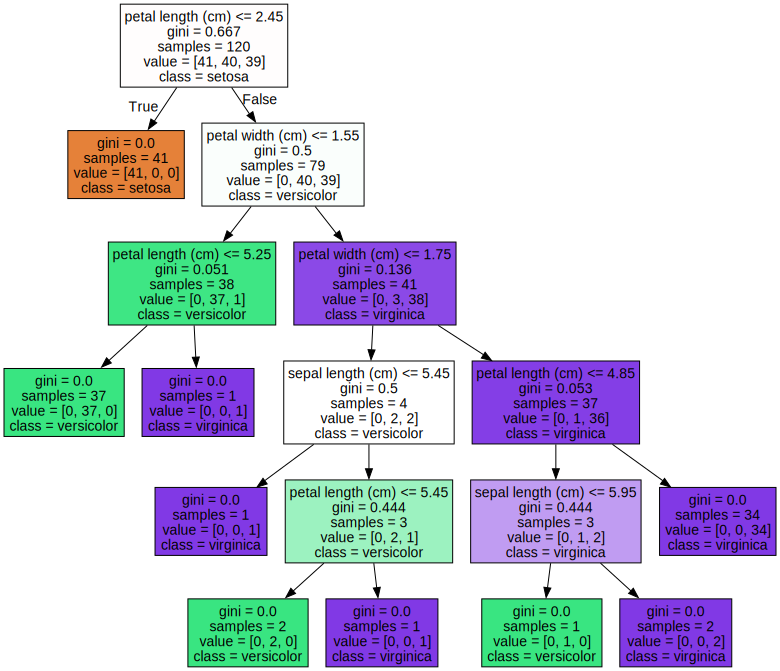

In [24]:
print('===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* petal length(cm) <= 2.45 와 같이 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로 이런 것이 없는 것은 리프노드입니다.
* gini는 다음의 value = [ ] 로 주어진 데이터 분포에서의 지니계수
* samples : 현 규칙에 해당하는 데이터 건수
* value = [ ] 클래스 값 기반의 데이터 건수 ( 이번 예제의 경우 0: Setosa, 1 : Veericolor, 2: Virginia 를 나타냄 )